# Pre-Processing

In [58]:
# Init pack
#run the model without additional noise, plot the same intial conditions observe if the determinstic emulation matches the physical model
#emulator smooths out to a state in the same way as the physical model

import numpy as np
import numpy as np
from scipy.integrate import solve_ivp
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import sys
import torch
import matplotlib.pyplot as plt
from scipy.stats import linregress
from tqdm import tqdm


psi = np.load(r'/home/fabio/work/HM_and_AI_models/VAE_Model/data/time_series_deterministic.npy')
print(psi.shape)

# psi = psi[:,1,:]
print(psi.shape)

# Normalization
mean_psi = np.mean(psi, axis=0, keepdims=True)
mean = np.mean(mean_psi, axis=0, keepdims=True)

std_psi = np.std(psi, axis=0, keepdims=True)
normalized_psi = (psi - mean_psi) / std_psi
print(mean_psi)
print(std_psi)


# Pre-processing
lead = 1

trainN = 300000
valN = 50000
index = 63


psi_train_input = torch.tensor(normalized_psi[0:trainN, :], dtype=torch.float32)
psi_train_label = torch.tensor(normalized_psi[lead: trainN + lead, :], dtype=torch.float32)

psi_val_input = torch.tensor(normalized_psi[trainN:trainN+valN], dtype=torch.float32)
psi_val_label = torch.tensor(normalized_psi[trainN+lead:trainN+valN+lead], dtype=torch.float32)

print(psi_train_input.shape)
print(psi_train_label.shape)
print(psi_val_input.shape)
print(psi_val_label.shape)
plt.show()
# plt.plot(psi_val_input[0:50000,63]

(1000000, 75)
(1000000, 75)
[[ 5.47633454e+00  5.85292264e+00  5.59298497e+00  4.96925701e+00
   4.18959796e+00  3.39765643e+00  2.67585743e+00  2.05653990e+00
   1.55583105e+00  1.19849984e+00  9.88756116e-01  8.88185454e-01
   8.42262535e-01  8.08007354e-01  7.62137576e-01  6.97936426e-01
   6.19065465e-01  5.33371104e-01  4.48086879e-01  3.67630774e-01
   2.93696440e-01  2.26221254e-01  1.64318764e-01  1.06838231e-01
   5.25395690e-02  1.59326707e+00  2.79543874e+00  3.54657207e+00
   3.86956405e+00  3.82007303e+00  3.47409549e+00  2.93014015e+00
   2.29319540e+00  1.64247448e+00  1.04115559e+00  5.57901349e-01
   2.31983472e-01  5.50459508e-02 -9.71874540e-03 -5.34117572e-03
   3.11263303e-02  7.32526258e-02  1.06065536e-01  1.24109578e-01
   1.27794189e-01  1.19934251e-01  1.03660926e-01  8.16360950e-02
   5.59691606e-02  2.83245767e-02  4.69556452e+00  5.88168502e+00
   7.00109355e+00  8.03809163e+00  8.97886238e+00  9.82168129e+00
   1.05895574e+01  1.13290805e+01  1.20914097e+0

# Model Architecture

In [59]:
# Define the decoder (MLP)
class Decoder(nn.Module):
    def __init__(self, output_dim, condition_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(condition_dim, 512)  
        self.fc2 = nn.Linear(512, 512)  
        self.fc3 = nn.Linear(512, 512) 
        self.fc4 = nn.Linear(512, 512)  
        self.fc5 = nn.Linear(512, 512)  
        self.fc6 = nn.Linear(512, 512)  
        self.fc_output = nn.Linear(512, output_dim)

    def forward(self, condition):
        condition = torch.relu(self.fc1(condition))  # Activation function for hidden layer
        condition = torch.relu(self.fc2(condition)) + condition
        condition = torch.relu(self.fc3(condition)) + condition
        condition = torch.relu(self.fc4(condition)) + condition
        condition = torch.relu(self.fc5(condition)) + condition
        condition = torch.relu(self.fc6(condition)) + condition
        output = self.fc_output(condition)
        return output

# Define the LatentDecoder class
class LatentDecoder(nn.Module):
    def __init__(self, output_dim, condition_dim):
        super(LatentDecoder, self).__init__()
        self.decoder = Decoder(output_dim, condition_dim)

    def decode(self, condition):
        return self.decoder(condition)

    def forward(self, condition):
        output = self.decode(condition)
        return output

output_dim = 75
latent_dim = 1024
condition_dim = 75
batch_size = 100
num_epochs = 1000

# Initialize Model and Set Folder Path

In [60]:
import datetime
import os

model = LatentDecoder(output_dim, condition_dim)
model = model.cuda()

optimizer = optim.Adam(model.parameters(), lr=0.0001)


timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S.%f")
folder = f"model_at_{timestamp}"
model_weights_path = f'{folder}/model_weights_pytorch.pth'
os.makedirs(folder)

# Training

Epoch 1, 
        Reconstrunction Loss: 0.0010526092955842614

        Validation Reconstrunction Loss: 0.32848450541496277


Mini Inference at Epoch 0:   0%|          | 0/99 [00:00<?, ?it/s]/tmp/ipykernel_1115/3869672083.py:91: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = model.decode(torch.tensor(initial_cond).float().cuda()).detach().cpu().numpy()
Mini Inference at Epoch 0: 100%|██████████| 99/99 [00:00<00:00, 628.11it/s]


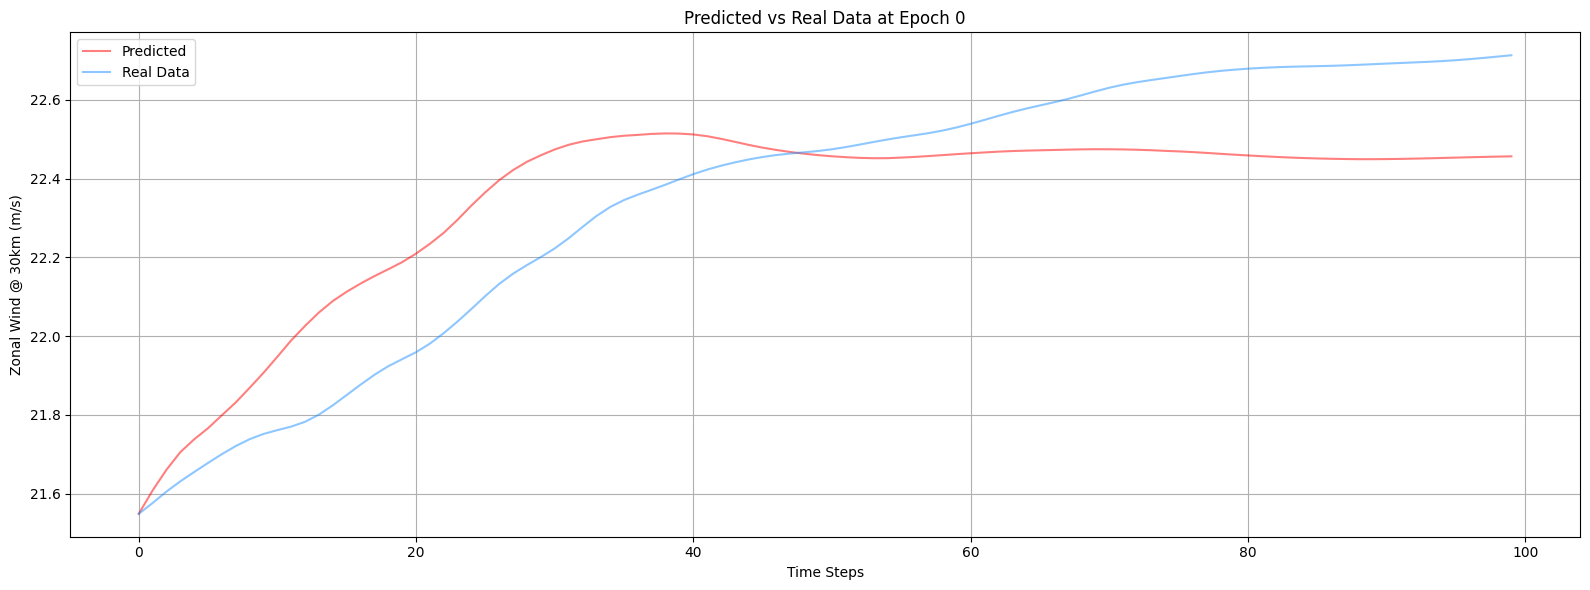

Epoch 2, 
        Reconstrunction Loss: 0.0010428562527522445

        Validation Reconstrunction Loss: 0.4182968735694885
Epoch 3, 
        Reconstrunction Loss: 0.0010462995851412416

        Validation Reconstrunction Loss: 0.3001490533351898
Epoch 4, 
        Reconstrunction Loss: 0.0010498634073883295

        Validation Reconstrunction Loss: 0.5932472944259644
Epoch 5, 
        Reconstrunction Loss: 0.001056652283295989

        Validation Reconstrunction Loss: 0.37862855195999146
Epoch 6, 
        Reconstrunction Loss: 0.0010482481447979808

        Validation Reconstrunction Loss: 0.49072957038879395
Epoch 7, 
        Reconstrunction Loss: 0.0010451481211930513

        Validation Reconstrunction Loss: 0.4742611348628998
Epoch 8, 
        Reconstrunction Loss: 0.0010537506313994527

        Validation Reconstrunction Loss: 0.6807510256767273
Epoch 9, 
        Reconstrunction Loss: 0.0010483337100595236

        Validation Reconstrunction Loss: 0.4011625647544861
Epoch 10, 
    

Mini Inference at Epoch 10: 100%|██████████| 99/99 [00:00<00:00, 1083.43it/s]


<Figure size 640x480 with 0 Axes>

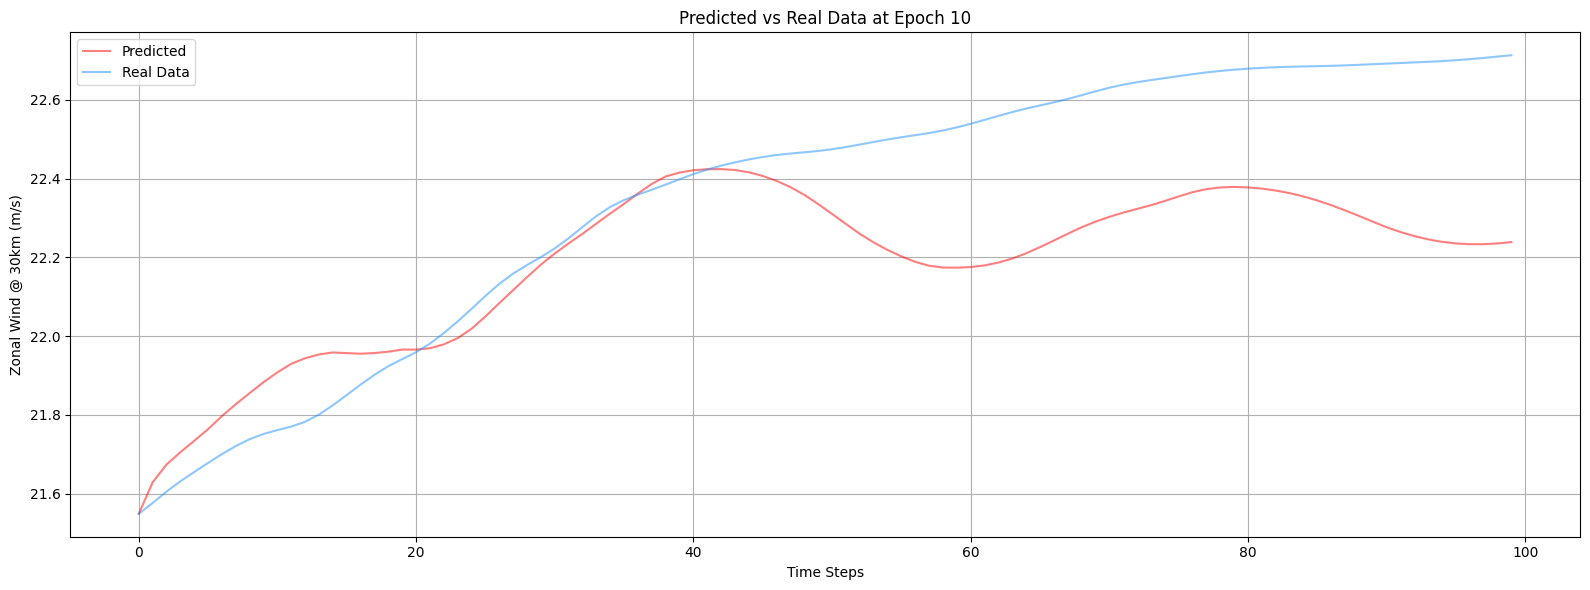

Epoch 12, 
        Reconstrunction Loss: 0.0010513666784390807

        Validation Reconstrunction Loss: 0.5936036705970764
Epoch 13, 
        Reconstrunction Loss: 0.0010451674461364746

        Validation Reconstrunction Loss: 0.6115322709083557
Epoch 14, 
        Reconstrunction Loss: 0.0010466467356309295

        Validation Reconstrunction Loss: 0.4120229184627533
Epoch 15, 
        Reconstrunction Loss: 0.001036804635077715

        Validation Reconstrunction Loss: 0.9941031336784363
Epoch 16, 
        Reconstrunction Loss: 0.0010453882860019803

        Validation Reconstrunction Loss: 0.38615506887435913
Epoch 17, 
        Reconstrunction Loss: 0.0010518011404201388

        Validation Reconstrunction Loss: 0.5667401552200317
Epoch 18, 
        Reconstrunction Loss: 0.0010462519712746143

        Validation Reconstrunction Loss: 0.558533251285553
Epoch 19, 
        Reconstrunction Loss: 0.0010532854357734323

        Validation Reconstrunction Loss: 0.7779096364974976
Epoch 20,

Mini Inference at Epoch 20: 100%|██████████| 99/99 [00:00<00:00, 1294.07it/s]


<Figure size 640x480 with 0 Axes>

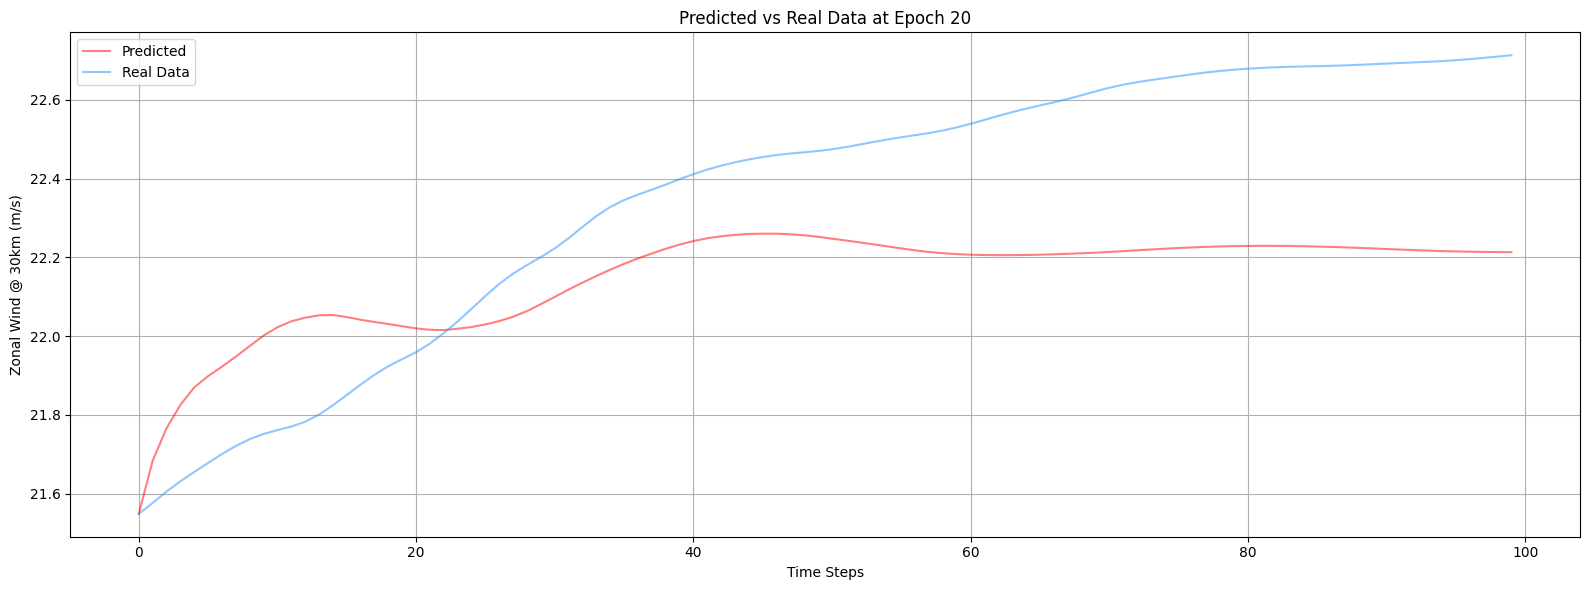

In [ ]:
from scipy.stats import linregress
from tqdm import tqdm

def normalize_transition_time(slope_value, delta, transition_real):
    normalized = 1 - np.exp(-np.abs((slope_value - transition_real)) / delta)
    return normalized

def total_variation_distance(p, q):
    p = np.array(p)
    q = np.array(q)
    return 0.5 * np.sum(np.abs(p - q))

def calculate_transition_durations(y_values, upper_bound, lower_bound):
    times_between_transitions = []
    transition_start = None
    above_upper = False
    below_lower = False
    for i in range(1, len(y_values)):
        if y_values[i] < lower_bound:
            below_lower = True
            above_upper = False
        elif y_values[i] > upper_bound:
            if below_lower and transition_start is not None:
                times_between_transitions.append(i - transition_start)
                transition_start = None
            above_upper = True
            below_lower = False
        if below_lower and transition_start is None:
            transition_start = i
    return times_between_transitions


upper_bound = 53.8 / 2.8935
lower_bound = 7.41
level = 63
initial_val = 200_000

# Train the model
for epoch in range(num_epochs):

    model.train()
    for batch in range (0, trainN, batch_size):

        input_batch = psi_train_input[batch:batch + batch_size,:]
        label_batch = psi_train_label[batch:batch + batch_size,:]
        optimizer.zero_grad()

        output = model(input_batch.float().cuda())

        # Reconstruction loss
        reconstruction_loss = F.huber_loss(output, label_batch.float().cuda(), reduction="mean", delta = 1)
        
        #current loss
        loss = reconstruction_loss

        loss.backward()
        optimizer.step()

    print(f'''Epoch {epoch+1}, 
        Reconstrunction Loss: {loss.item()}''')

    # Validation Loss
    for batch in range (0, valN, batch_size):

        input_batch = psi_val_input[batch:batch + batch_size,:]
        label_batch = psi_val_label[batch:batch + batch_size,:]
        output = model(input_batch.float().cuda())

        # Reconstruction loss
        val_reconstruction_loss = F.huber_loss(output, label_batch.float().cuda(), reduction="mean", delta = 1)
        
        # Total loss
        val_loss = val_reconstruction_loss

    print(f'''
        Validation Reconstrunction Loss: {val_loss.item()}''')
      
    #Save and make an inference every 10 epochs of training
    if (epoch % 10 == 0):
        torch.save(model.state_dict(), f"{folder}/model_at_epoch{epoch}")
        model.eval()

        with torch.no_grad():

            initial_cond = torch.reshape(torch.tensor(normalized_psi[initial_val,:]), [1, 75]).float().cuda()
            time_steps = 100
            pred = np.zeros([time_steps, 75])
            pred[0, :] = initial_cond.detach().cpu().numpy()
            
            for k in tqdm(range(1 , time_steps), desc = f"Mini Inference at Epoch {epoch}"):
                    y = model.decode(torch.tensor(initial_cond).float().cuda()).detach().cpu().numpy()
                    pred[k, :] = y
                    initial_cond = y  
        
        pred_mean = pred * std_psi + mean_psi

        plot_real_data = psi[initial_val : initial_val + time_steps, :]
        plt.figure(figsize=(16, 6))

        plt.plot(pred_mean[:, level], label='Predicted', color='red', alpha=0.5)
        plt.plot(plot_real_data[:, level], label='Real Data', color='dodgerblue',alpha= .5)

        plt.title(f'Predicted vs Real Data at Epoch {epoch}')
        plt.xlabel('Time Steps')
        plt.ylabel('Zonal Wind @ 30km (m/s)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        plt.savefig(f'{folder}/epoch_{epoch}_pred_vs_real.png')

In [ ]:

# MODIFY THIS LINE FOR MODEL TESTING
epoch = 140
initial_val = 500_000

model_weights_path = f'/home/fabio/work/HM_and_AI_models/VAE_Model/Push/Archictures/weights_100/model_at_epoch{epoch}'

if os.path.exists(model_weights_path):
    model.load_state_dict(torch.load(model_weights_path))
    print(f"Model weights loaded from {model_weights_path}.")

with torch.no_grad():

    initial_cond = torch.reshape(torch.tensor(normalized_psi[initial_val,:]), [1, 75]).float().cuda()
    time_steps = 100
    pred = np.zeros([time_steps, 75])
    pred[0, :] = initial_cond.detach().cpu().numpy()
    
    for k in tqdm(range(1 , time_steps), desc = f"Mini Inference at Epoch {epoch}"):
            y = model.decode(torch.tensor(initial_cond).float().cuda()).detach().cpu().numpy()
            pred[k, :] = y
            initial_cond = y  

pred_mean = pred * std_psi + mean_psi

plot_real_data = psi[initial_val : initial_val + time_steps, :]
plt.figure(figsize=(16, 6))

plt.plot(pred_mean[:, level], label='Predicted', color='red', alpha=0.5)
plt.plot(plot_real_data[:, level], label='Real Data', color='dodgerblue',alpha= .5)

plt.title(f'Predicted vs Real Data at Epoch {epoch}')
plt.xlabel('Time Steps')
plt.ylabel('Zonal Wind @ 30km (m/s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig(f'{folder}/epoch_{epoch}_pred_vs_real.png')


/tmp/ipykernel_1115/1708946674.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_weights_path))


Model weights loaded from /home/fabio/work/HM_and_AI_models/VAE_Model/Push/Archictures/weights_100/model_at_epoch140.


Inference:   0%|          | 0/99 [00:00<?, ?it/s]


TypeError: LatentDecoder.decode() missing 1 required positional argument: 'condition'

/tmp/ipykernel_46201/1615594468.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_weights_path))


Model weights loaded from /home/fabio/work/HM_and_AI_models/VAE_Model/Push/Archictures/weights/model_at_epoch80.


Inference:   0%|          | 0/2 [00:00<?, ?it/s]

Inference: 100%|██████████| 2/2 [00:00<00:00, 289.95it/s]


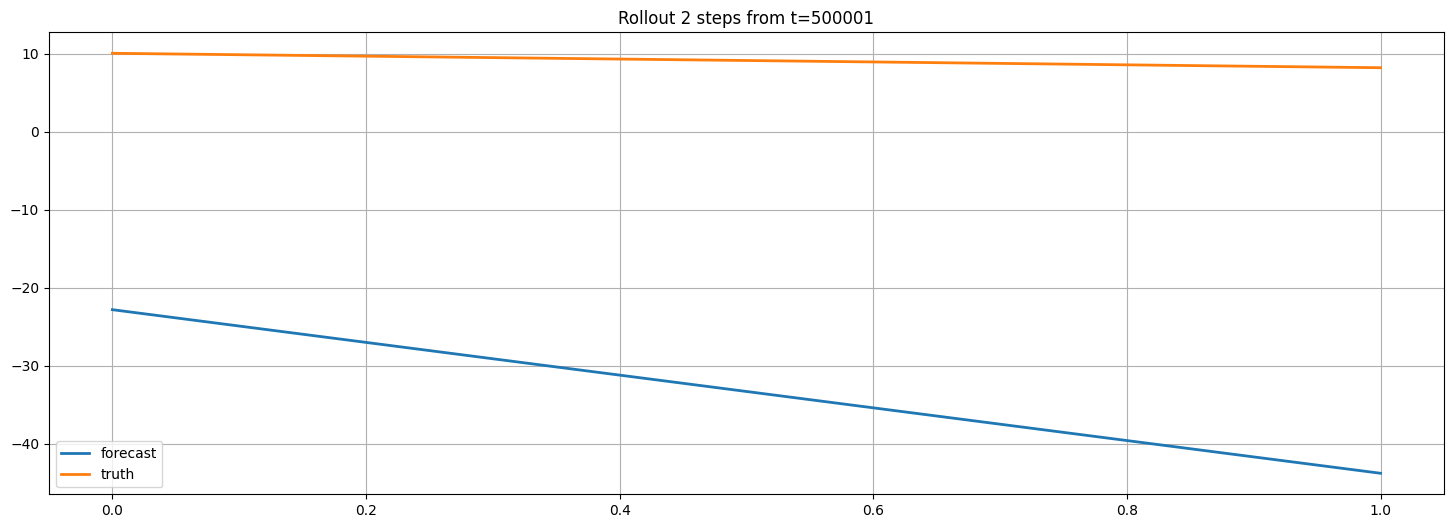

In [ ]:
# ------------------------------------------------------------
# 1)  Choose the start index and verify you have enough data
# ------------------------------------------------------------
t0        = 500_001 # <-- starting time step
time_step = 2 # <-- forecast length
assert psi.shape[0] > t0 + time_step, "ψ is not long enough"

# ------------------------------------------------------------
# 2)  Load the model weights (unchanged)
# ------------------------------------------------------------

if os.path.exists(model_weights_path):
    model.load_state_dict(torch.load(model_weights_path))
    print(f"Model weights loaded from {model_weights_path}.")

# ------------------------------------------------------------
# 3)  Run the forecast
# ------------------------------------------------------------

for ens in range(1):                     # still one ensemble member
    # ---- (a) build the NORMALISED initial condition -----------------
    x0          = psi[t0, :]                           # raw state at t0
    initial_cond = torch.tensor(                      # shape (1,75)
        (x0 - mean_psi[0]) / std_psi[0]
    ).float().unsqueeze(0)

    # ---- (b) containers --------------------------------------------
    condition    = torch.zeros((1, latent_dim))
    condition = torch.randn_like(condition)
    pred = np.zeros((time_step, 75))      # 2-D is simpler

    # ---- (c) autoregressive rollout --------------------------------
    for k in tqdm(range(time_step), desc="Inference"):
        y = (
            model.decode(condition.cuda(), initial_cond.cuda())
            .detach()
            .cpu()
            .numpy()
        )                       # y shape (1,75)
        pred[k] = y             # fills (75,) into pred[k]

        # denorm->renorm so the next step uses y as state
        y_denorm     = y * std_psi + mean_psi
        initial_cond = torch.tensor((y_denorm - mean_psi) / std_psi).float()

    # ------------------------------------------------------------
    # 4)  Denormalise the whole forecast and the matching truth
    # ------------------------------------------------------------
    pred_denorm   = pred * std_psi + mean_psi
    truth_window  = psi[t0 : t0 + time_step] * std_psi + mean_psi

    # ------------------------------------------------------------
    # 5)  Quick visual check and save
    # ------------------------------------------------------------
    plt.figure(figsize=(18,6))
    plt.plot(pred_denorm[:, 63],   label="forecast", linewidth=2)
    plt.plot(truth_window[:, 63],  label="truth",    linewidth=2)
    plt.title(f"Rollout {time_step} steps from t={t0}")
    plt.grid(True);  plt.legend()
    out_dir = "/home/fabio/work/HM_and_AI_models/VAE_Model/Push/Archictures/inferences"
    plt.savefig(f"{out_dir}/pictures/epoch_{epoch}_{ens}.png")
    plt.show()

    np.save(f"{out_dir}/data/epoch_{epoch}_{ens}.npy", pred_denorm)


# Testing

In [ ]:
#FLAGS to determine testing
plot_data = 1
#what level do you want to plot
level = 63
CCDF = 1
Bi_modal_distribution = 1
single_step_profiles = 1
#for the single_step_profiles
NUM_SAMPLES = 5
#what weights do you want to use?

MODEL_PATH = r"/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_KL_TEST_at_2025-06-03 10:39:03.562572/model_at_2_with_kl_10/checkpoint_2"
LEVEL = 63

import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

# Load the data; shape = (300000, 2, 75)
real_data = np.load(r"/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/data/actual/long_run_310k.npy")
predictions = np.load(r"/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/predictions_best_checkpoint_and_cycle_Resnet_VAE_1.npy")

#reshape the predictions so that it matches the real_data shape
print(predictions.shape)
print(real_data.shape)
timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S.%f")
folder = f"testing_at_{timestamp}"
os.mkdir(folder)
subfolders = ['timeseries', 'CCDF', 'bi_modal_distribution', 'single_step_profiles']
# Create each subdirectory inside the main folder
for subfolder in subfolders:
    path = os.path.join(folder, subfolder)
    os.mkdir(path)
    print(f"Created subfolder: {path}")
SAVE_DIR = os.path.join(folder, "single_step_profiles")
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import random

model = ConditionalVAE(latent_dim, output_dim, condition_dim)
model = model.cuda()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# MODIFY THIS LINE FOR MODEL TESTING
model_weights_path = "/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_lat1024_at_2025-04-11 12:46:39.526973/model_at_0/checkpoint_3"

if os.path.exists(model_weights_path):
    model.load_state_dict(torch.load(model_weights_path))
    print(f"Model weights loaded from {model_weights_path}.")
    
if (plot_data):
    #note that the value 300000 will have to change depending on the real and predictions data length
    u_profile_real = real_data[:300000, 1, level]  # Match time length with predictions
    u_profile_pred = predictions[:, level]
    time_steps = np.arange(len(u_profile_pred))

    # === Plot ===
    plt.figure(figsize=(14, 6))

    plt.plot(time_steps, u_profile_real, label='Real Data', alpha=0.7)
    plt.plot(time_steps, u_profile_pred, label='Predictions', linestyle='--')


    # Labels, legend, and formatting
    plt.xlabel('Time step')
    plt.ylabel('U (m/s)')
    plt.title(f'Time Series of U at Vertical Level {level}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    save_path = os.path.join(folder, "timeseries")
    save_path = os.path.join(save_path, "real_prediction_plot")
    plt.savefig(save_path)
    plt.show()

if (CCDF):
    real_data_1d = real_data[:, 1, 63]  # Now shape is (309700,)
    predictions_1d = predictions[:, 63]  # shape (300000,)

    # Define bounds (assuming they apply to both datasets)
    upper_bound = 53.8 / 2.8935
    lower_bound = 1.75 / 2.8935

    # Function to calculate transition durations
    def calculate_transition_durations(y_values, upper_bound, lower_bound):
        times_between_transitions = []
        transition_start = None
        above_upper = False
        below_lower = False

        for i in range(1, len(y_values)):
            if y_values[i] < lower_bound:  
                below_lower = True
                above_upper = False
            elif y_values[i] > upper_bound:  
                if below_lower and transition_start is not None:
                    times_between_transitions.append(i - transition_start)
                    transition_start = None  
                above_upper = True
                below_lower = False

            if below_lower and transition_start is None:
                transition_start = i

        return times_between_transitions

    # Compute transition durations for real data
    real_durations = calculate_transition_durations(real_data_1d, upper_bound, lower_bound)

    # Compute transition durations for predictions data
    pred_durations = calculate_transition_durations(predictions_1d, upper_bound, lower_bound)

    # Plot setup
    plt.figure(figsize=(10, 6))

    # === REAL DATA CCDF AND FIT ===
    if len(real_durations) == 0:
        print("No transitions detected in real data with current bounds!")
    else:
        real_data_sorted = np.sort(real_durations)
        x_line_real = np.linspace(min(real_data_sorted), max(real_data_sorted), 100)
        exponential_fit_real = 1/np.mean(real_data_sorted)
        y_values_real = exponential_fit_real*x_line_real
        plt.plot(x_line_real, y_values_real, 'b-', label=f'Real Exp Fit (slope={exponential_fit_real:.4f})', linewidth=2)

    # === PREDICTIONS CCDF AND FIT ===
    if len(pred_durations) == 0:
        print("No transitions detected in predictions with current bounds!")
    else:
        pred_data_sorted = np.sort(pred_durations)
        x_line_pred = np.linspace(min(pred_data_sorted), max(pred_data_sorted), 100)
        exponential_fit_pred = 1/np.mean(pred_data_sorted)
        y_values_pred = exponential_fit_pred*x_line_pred
        plt.plot(x_line_pred, y_values_pred, 'r-', label=f'Pred Exp Fit (slope={exponential_fit_pred:.4f})', linewidth=2)

    print(1/np.mean(real_data_sorted))
    print(1/np.mean(pred_data_sorted))
    # Plot labels and formatting
    plt.xlabel('Time Duration (Steps)')
    plt.ylabel('CCDF')
    plt.title('CCDF of Time Between B->A and A->B Transitions (Exponential Fit)')
    plt.yscale("linear")  # y-axis log scale
    plt.xscale("linear")  # x-axis linear scale
    plt.grid()
    plt.legend()
    plt.tight_layout()
    save_path = os.path.join(folder, "CCDF")
    save_path = os.path.join(save_path, "CCDF_plot")
    plt.savefig(save_path)
    plt.show()
if (Bi_modal_distribution):
    zonal_wind_data_real = real_data[:, 1, 63]  # variable index 1 (e.g., zonal wind), level 60
    zonal_wind_data_predictions = predictions[:, 63]  # variable index 0 (predictions), level 60

    print(f"Shape of zonal_wind_data_real: {zonal_wind_data_real.shape}")
    print(f"Shape of zonal_wind_data_predictions: {zonal_wind_data_predictions.shape}")

    # Plot the bimodal histogram
    plt.figure(figsize=(12, 6))

    # Create histograms (overlaid)
    sns.histplot(zonal_wind_data_real, bins=50, kde=True, color='black', alpha=0.6, element='step', label='Real Data')
    sns.histplot(zonal_wind_data_predictions, bins=50, kde=True, color='red', alpha=0.6, element='step', label='Predictions')

    # Customize plot labels and title
    plt.title('Distribution of Zonal Winds For Real Data and Predictions', fontsize=16)
    plt.xlabel('Zonal Wind (m/s)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Add vertical lines at means
    plt.axvline(np.mean(zonal_wind_data_real), color='black', linestyle='--', label=f'Real Mean: {np.mean(zonal_wind_data_real):.2f}')
    plt.axvline(np.mean(zonal_wind_data_predictions), color='red', linestyle='--', label=f'Pred Mean: {np.mean(zonal_wind_data_predictions):.2f}')

    # Final plot settings
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    save_path = os.path.join(folder, "bi_modal_distribution")
    save_path = os.path.join(save_path, "bi_modal_distribution_plot")
    plt.savefig(save_path)
    plt.show()
if (single_step_profiles):
    # Ensure save directory exists
    os.makedirs(SAVE_DIR, exist_ok=True)

    # === Load model weights ===
    model.load_state_dict(torch.load(MODEL_PATH))
    model.eval()

    # === Randomly sample time points from real data ===
    time_indices = random.sample(range(0, real_data.shape[0] - 2), NUM_SAMPLES)
    print(f"Randomly sampled time steps: {time_indices}")

    # === Time series visualization ===
    real_data_timeseries = real_data[:, 1, LEVEL]
    time_steps_all = np.arange(len(real_data_timeseries))

    plt.figure(figsize=(12, 6))
    plt.plot(time_steps_all, real_data_timeseries, label="Real Data at Level 61", color='blue')

    # Mark sample points
    for idx_num, idx in enumerate(time_indices):
        plt.axvline(x=idx, color='green', linestyle='--', linewidth=2)
    if len(time_indices) > 0:
        plt.axvline(x=time_indices[0], color='green', linestyle='--', linewidth=2, label='Sampled Points')

    plt.title("Real Data Time Series with Sampled Points Highlighted")
    plt.xlabel("Time Step")
    plt.ylabel("U (m/s) at Level 61")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    save_path = os.path.join(SAVE_DIR, "real_data_timeseries_with_samples.png")
    plt.savefig(save_path)
    plt.show()

    # === Iterate over each sampled time point ===
    for i, time_step in enumerate(time_indices):
        next_time_step = time_step + 1

        # === Real data: current and next ===
        real_current = real_data[time_step, 1, :]       
        real_next = real_data[next_time_step, 1, :]      

        # === Normalize real_current and make prediction for next step ===
        initial_cond = torch.reshape(torch.tensor(psi[time_step,:]), [1, 75])
        condition = torch.zeros([1,latent_dim])
        num_ens = 1
        pred = np.zeros ([time_step, 75, num_ens])

        with torch.no_grad():
            condition = torch.randn_like(condition)
            print(condition.shape, initial_cond.shape)
            y = (model.decode(condition.float().cuda(),initial_cond.float().cuda())).detach().cpu().numpy()

        # === Denormalize predicted next ===
        pred_next_denorm = y.squeeze() * std_psi.squeeze() + mean_psi.squeeze()

        # === Extract U, Re(Psi), Im(Psi) components ===
        # U profiles
        U_current_real = real_current[51:74]
        U_next_real = real_next[51:74]
        U_next_pred = pred_next_denorm[51:74]

        # Re(Psi) profiles
        RePsi_current_real = real_current[0:24]
        RePsi_next_real = real_next[0:24]
        RePsi_next_pred = pred_next_denorm[0:24]

        # Im(Psi) profiles
        ImPsi_current_real = real_current[25:50]
        ImPsi_next_real = real_next[25:50]
        ImPsi_next_pred = pred_next_denorm[25:50]

        # === Differences ===
        U_diff_real = U_next_real - U_current_real
        U_diff_pred = U_next_pred - U_current_real

        RePsi_diff_real = RePsi_next_real - RePsi_current_real
        RePsi_diff_pred = RePsi_next_pred - RePsi_current_real

        ImPsi_diff_real = ImPsi_next_real - ImPsi_current_real
        ImPsi_diff_pred = ImPsi_next_pred - ImPsi_current_real

        # === Create a single figure with 3 rows (U, Re(Psi), Im(Psi)) ===
        fig, axes = plt.subplots(3, 2, figsize=(16, 18))  # 3 rows, 2 columns (Profile and Difference)

        z_levels_U = np.linspace(0, 70, 23)
        z_levels_RePsi = np.linspace(0, 70, 24)
        z_levels_ImPsi = np.linspace(0, 70, 25)

        # --- U ---
        axes[0, 0].plot(U_current_real, z_levels_U, 'x-', label="Real Current")
        axes[0, 0].plot(U_next_real, z_levels_U, 'd-', label="Real Next")
        axes[0, 0].plot(U_next_pred, z_levels_U, 's--', label="Predicted Next")
        axes[0, 0].set_title(f"U Profiles @ Step {time_step}")
        axes[0, 0].set_xlabel("U (m/s)")
        axes[0, 0].set_ylabel("Vertical Levels (km)")
        axes[0, 0].legend()

        axes[0, 1].plot(U_diff_real, z_levels_U, 'xb', label="Real Δ (Next - Current)")
        axes[0, 1].plot(U_diff_pred, z_levels_U, 'o--r', label="Pred Δ (Next - Current)")
        axes[0, 1].set_title("U Difference (Next - Current)")
        axes[0, 1].set_xlabel("ΔU (m/s)")
        axes[0, 1].legend()

        # --- Re(Psi) ---
        axes[1, 0].plot(RePsi_current_real, z_levels_RePsi, 'x-', label="Real Current")
        axes[1, 0].plot(RePsi_next_real, z_levels_RePsi, 'd-', label="Real Next")
        axes[1, 0].plot(RePsi_next_pred, z_levels_RePsi, 's--', label="Predicted Next")
        axes[1, 0].set_title(f"Re(Psi) Profiles @ Step {time_step}")
        axes[1, 0].set_xlabel("Re(Psi)")
        axes[1, 0].set_ylabel("Vertical Levels (km)")
        axes[1, 0].legend()

        axes[1, 1].plot(RePsi_diff_real, z_levels_RePsi, 'xb', label="Real Δ (Next - Current)")
        axes[1, 1].plot(RePsi_diff_pred, z_levels_RePsi, 'o--r', label="Pred Δ (Next - Current)")
        axes[1, 1].set_title("Re(Psi) Difference (Next - Current)")
        axes[1, 1].set_xlabel("ΔRe(Psi)")
        axes[1, 1].legend()

        # --- Im(Psi) ---
        axes[2, 0].plot(ImPsi_current_real, z_levels_ImPsi, 'x-', label="Real Current")
        axes[2, 0].plot(ImPsi_next_real, z_levels_ImPsi, 'd-', label="Real Next")
        axes[2, 0].plot(ImPsi_next_pred, z_levels_ImPsi, 's--', label="Predicted Next")
        axes[2, 0].set_title(f"Im(Psi) Profiles @ Step {time_step}")
        axes[2, 0].set_xlabel("Im(Psi)")
        axes[2, 0].set_ylabel("Vertical Levels (km)")
        axes[2, 0].legend()

        axes[2, 1].plot(ImPsi_diff_real, z_levels_ImPsi, 'xb', label="Real Δ (Next - Current)")
        axes[2, 1].plot(ImPsi_diff_pred, z_levels_ImPsi, 'o--r', label="Pred Δ (Next - Current)")
        axes[2, 1].set_title("Im(Psi) Difference (Next - Current)")
        axes[2, 1].set_xlabel("ΔIm(Psi)")
        axes[2, 1].legend()

        # === Finalize and Save ===
        plt.suptitle(f"Single Step Profile Comparisons at Time Step {time_step}", fontsize=18)
        plt.tight_layout(rect=[0, 0.03, 1, 0.97])

        save_path = os.path.join(SAVE_DIR, f"Profile_Summary_point_{time_step}.png")
        plt.savefig(save_path)
        plt.show()

        print(f"Combined plot saved for sampled point {time_step}")

    # Final debug
    print("Finished processing all sampled points.")
        # Debugging prints
    print(predictions.shape) 
    print(real_data.shape)